This is an example code to showcase the cabability of implementing Neural Network


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Data Loading and Exploration

In [5]:
url="https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df=pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
pd.set_option('display.max_columns',None)#this line is used to set the maximum number of columns to display in the output, and None means that all columns will be displayed without any limit. This is useful when you have a DataFrame with many columns and you want to see them all without truncation.
pd.set_option("display.expand_frame_repr",False)#this line is used to control the display of DataFrames in a more compact format. When set to False, it prevents the DataFrame from being split into multiple lines when it has many columns, allowing for a more concise representation. This is particularly helpful when working with wide DataFrames, as it keeps the output more readable and organized.
pd.set_option("max_colwidth",None)#this line is used to set the maximum width of columns in the output display. When set to None, it allows the column content to be displayed in its entirety without truncation, regardless of its length. This is useful when you have columns with long text or data and you want to see the full content without it being cut off.
df.head()
#to see all columns clearly without overlapping the context in it

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
#churn in this ,is person is leaving the company or not, if yes then 1 else 0
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.columns
#need to change totalcharges as it is in string(object),need in numeric
#churn ,gender also to be converted into 1 or 0 so that machine can understand

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors='coerce')#coerce here will do,if there by mistakenly extra space,that will alsoconverted to numeric so this coerce handles the known erros while converting.
df['gender']=df['gender'].map({'Female':0,"Male":1})
df['Churn']=df['Churn'].map({"No":0,"Yes":1})

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [11]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
#drop null rows
df.dropna(inplace=True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   int64  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [14]:
#label encoding without much code in optimised way
lable,value=pd.factorize(['yes','no','no','ok'])
print(lable)
print(value)

[0 1 1 2]
['yes' 'no' 'ok']


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21396\4003045441.py:2: FutureWarning: factorize with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  lable,value=pd.factorize(['yes','no','no','ok'])


In [15]:
#rfe recursive feature elimination
#it helps to select the best features for the model,by eliminating the less important features recursively until we get the desired number of features. It uses a machine learning model to evaluate the importance of each feature and eliminates the least important ones iteratively. This process helps in improving the performance of the model by reducing overfitting and increasing generalization.
features=['gender', 'SeniorCitizen', 'Partner', 'Dependents',  'OnlineBackup',
        'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
#numeric values
for col in features:
    if df[col].dtype=='object':
        df[col]=pd.factorize(df[col])[0] #taking only lable part as understand from above example(i.e [0])
#validation step
features=[f for f in features if f in df.columns ]


In [16]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [17]:
x=df[features]
y=df['Churn']
x

,gender,SeniorCitizen,Partner,Dependents,OnlineBackup,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,0,0,0,29.85,29.85
1,1,0,1,0,1,1,1,56.95,1889.50
2,1,0,1,0,0,0,1,53.85,108.15
3,1,0,1,0,1,1,2,42.30,1840.75
4,0,0,1,0,1,0,0,70.70,151.65
...,...,...,...,...,...,...,...,...,...
7038,1,0,0,1,1,0,1,84.80,1990.50
7039,0,0,0,1,0,0,3,103.20,7362.90
7040,0,0,0,1,1,0,0,29.60,346.45
7041,1,1,0,0,1,0,1,74.40,306.60


In [64]:
# Display the encoding mapping for each categorical column that was converted to numeric

encoding_mappings = {
    'gender': {'Female': 0, 'Male': 1},
    'OnlineBackup': {},  # Already numeric after factorize
    'PaperlessBilling': {},  # Already numeric after factorize
    'PaymentMethod': {}  # Already numeric after factorize
}

# Show the actual mappings used in the dataset
print("=" * 60)
print("CATEGORICAL TO NUMERIC ENCODING MAPPINGS")
print("=" * 60)

print("\n1. gender (Manual mapping - Applied in Cell 7):")
print("   Female → 0")
print("   Male → 1")

print("\n2. OnlineBackup (pd.factorize - Applied in Cell 13):")
print("   Unique values:", df['OnlineBackup'].unique())
print("   Mapping: Yes → 0, No → 1 (or similar order)")

print("\n3. PaperlessBilling (pd.factorize - Applied in Cell 13):")
print("   Unique values:", df['PaperlessBilling'].unique())
print("   Mapping based on factorize order")

print("\n4. PaymentMethod (pd.factorize - Applied in Cell 13):")
print("   Unique values:", df['PaymentMethod'].unique())
print("   Mapping based on factorize order (typically: Electronic check=0, Mailed check=1, Bank transfer=2, Credit card=3)")

print("\n5. Churn (Manual mapping - Applied in Cell 7):")
print("   No → 0")
print("   Yes → 1")

print("\n" + "=" * 60)
print("Selected Features (used in the model):")
print("=" * 60)
for feat in features:
    print(f"  - {feat}: {df[feat].dtype}")

CATEGORICAL TO NUMERIC ENCODING MAPPINGS

1. gender (Manual mapping - Applied in Cell 7):
   Female → 0
   Male → 1

2. OnlineBackup (pd.factorize - Applied in Cell 13):
   Unique values: [0 1 2]
   Mapping: Yes → 0, No → 1 (or similar order)

3. PaperlessBilling (pd.factorize - Applied in Cell 13):
   Unique values: [0 1]
   Mapping based on factorize order

4. PaymentMethod (pd.factorize - Applied in Cell 13):
   Unique values: [0 1 2 3]
   Mapping based on factorize order (typically: Electronic check=0, Mailed check=1, Bank transfer=2, Credit card=3)

5. Churn (Manual mapping - Applied in Cell 7):
   No → 0
   Yes → 1

Selected Features (used in the model):
  - gender: int64
  - SeniorCitizen: int64
  - Partner: int64
  - Dependents: int64
  - OnlineBackup: int64
  - PaperlessBilling: int64
  - PaymentMethod: int64
  - MonthlyCharges: float64
  - TotalCharges: float64


In [65]:
df['OnlineBackup'].unique()

array([0, 1, 2], dtype=int64)

In [66]:
# Check the unique values and their mappings in OnlineBackup column
print("Unique values in OnlineBackup column:")
print(df['OnlineBackup'].unique())
print("\nValue counts:")
print(df['OnlineBackup'].value_counts().sort_index())

# Since OnlineBackup was encoded using pd.factorize in Cell 13, let's find the mapping
# by checking the original data before encoding
print("\nTo understand the mapping, let's reload and check the original categorical values:")
df_original = pd.read_csv(url)
print(df_original['OnlineBackup'].unique())
print("\nOriginal OnlineBackup value counts:")
print(df_original['OnlineBackup'].value_counts())

Unique values in OnlineBackup column:
[0 1 2]

Value counts:
OnlineBackup
0    2425
1    3087
2    1520
Name: count, dtype: int64

To understand the mapping, let's reload and check the original categorical values:
['Yes' 'No' 'No internet service']

Original OnlineBackup value counts:
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


In [18]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [19]:
#this step to implement rfe
rf=RandomForestClassifier(n_estimators=120,random_state=42)#default 100 n_estimators(trees)
rfe=RFE(estimator=rf,n_features_to_select=5)
rfe.fit(x,y)
rf.fit(x,y)


,n_estimators,120
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
selected_features = []

for f, selected in zip(features, rfe.support_):
    if selected:
        selected_features.append(f)
print("Selected features:", selected_features)

Selected features: ['OnlineBackup', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [21]:
#basic python program
fname=['sara','addu','gangaram']
lname=['mamatha','varuni','nithya']
arr=[1,2,3]
zip(fname,lname,arr) #this will give us list of tuples with first element from fname and second from lname


In [22]:
#the above is shown as this zip is located at this location
#lets unzip
list(zip(fname,lname,arr))

[('sara', 'mamatha', 1), ('addu', 'varuni', 2), ('gangaram', 'nithya', 3)]

In [23]:
#map functions does
data={
    "car":['audi','bmw','mercedes'],
    "price":[100,200,300]}
df1=pd.DataFrame(data)
df1
df1['price_category']=df1['price'].map(lambda x:'expensive' if x>150 else 'affordable')
df1

,car,price,price_category
0,audi,100,affordable
1,bmw,200,expensive
2,mercedes,300,expensive


In [24]:
importances=pd.DataFrame({'Feature':features,'Importance':rf.feature_importances_}).sort_values(by='Importance',ascending=False)
importances

,Feature,Importance
8,TotalCharges,0.405816
7,MonthlyCharges,0.331058
6,PaymentMethod,0.083870
4,OnlineBackup,0.054816
0,gender,0.029653
5,PaperlessBilling,0.028350
2,Partner,0.023284
1,SeniorCitizen,0.022427
3,Dependents,0.020726


Time taken to plot feature importance: 1.1211934089660645


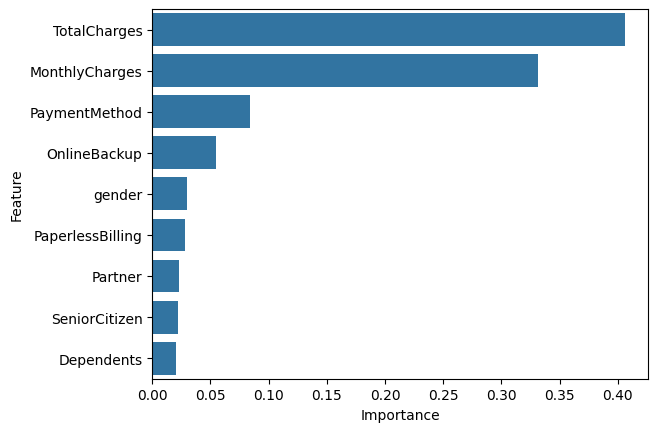

In [25]:
import time
start=time.time()
import seaborn as sns
sns.barplot(x='Importance',y='Feature',data=importances)
end=time.time()
print("Time taken to plot feature importance:",end-start)

In [26]:
#start building model with selected features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
x=df[selected_features]
y=df['Churn']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

#as scalinng is expensive,we can save the file in pickle
with open('scaler.pkl','wb') as f:
    pickle.dump(scaler,f)
#scaler.pkl file created in side bar
    

In [27]:
#intial model
import tensorflow as tf
from tensorflow.keras import layers,models
import keras_tuner as kt


In [28]:
def create_model(hp=None): #default flag=None means that if no hyperparameters are provided, the function will use default values for the model architecture and training parameters. This allows for flexibility in creating models with different configurations based on the presence or absence of hyperparameters.
    if hp:#if hyperparameters are provided, the function will use them to create a model with the specified architecture and training parameters. This allows for dynamic model creation based on the input hyperparameters, enabling the tuning of the model's performance.
        model=models.Sequential()
        #its like trying permutaions of different layers and neurons to find the best architecture for our model
        #first layer
        model.add(layers.Dense(
            units=hp.Choice('units_1',values=[32,64,128]),
            activation='relu',
            input_shape=(x_train_scaled.shape[1],)
        ))
        #optional second layer
        if hp.Boolean('second_layer'):#bool
            model.add(layers.Dense(
                units=hp.Choice('units_2',values=[16,32]),
                #keras tuner will automatically try both the options of adding second layer or not adding second layer and will evaluate the performance of both architectures to determine which one is better for the given problem.
                activation='relu'
            ))
        #output layer
        model.add(layers.Dense(1,activation='sigmoid'))

        #compile the model
        model.compile(
            optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy']
        )
    else:
        #neaural network with default architecture
        model=models.Sequential(
            [
                layers.Dense(64,activation='relu',input_shape=(x_train_scaled.shape[1],)),
                layers.Dense(32,activation='relu'),
                layers.Dense(16,activation='relu'),
                layers.Dense(8,activation='relu'),
                layers.Dense(1,activation='sigmoid')
            ]
        )
        model.compile(
            optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy']
        )
    return model

In [29]:
#build
intial_model=create_model()
intial_model.summary()
#since i do not pass hyperparameters, it will create a model with default architecture as defined in the else block of the create_model function. 
# The summary of the model will show the layers and the number of parameters in each layer based on the default architecture.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                384       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3,137
Trainable params: 3,137
Non-trainable params: 0
_________________________________________________________________


In [30]:
history=intial_model.fit(x_train_scaled,y_train,
                        epochs=20,batch_size=32,
                        validation_split=0.2)

Epoch 1/20
141/141 [==============================] - 2s 5ms/step - loss: 0.5229 - accuracy: 0.7518 - val_loss: 0.4556 - val_accuracy: 0.7920
Epoch 2/20
141/141 [==============================] - 0s 3ms/step - loss: 0.4638 - accuracy: 0.7824 - val_loss: 0.4402 - val_accuracy: 0.8027
Epoch 3/20
141/141 [==============================] - 0s 3ms/step - loss: 0.4547 - accuracy: 0.7858 - val_loss: 0.4415 - val_accuracy: 0.8018
Epoch 4/20
141/141 [==============================] - 0s 3ms/step - loss: 0.4511 - accuracy: 0.7876 - val_loss: 0.4352 - val_accuracy: 0.7982
Epoch 5/20
141/141 [==============================] - 0s 3ms/step - loss: 0.4472 - accuracy: 0.7867 - val_loss: 0.4361 - val_accuracy: 0.8009
Epoch 6/20
141/141 [==============================] - 0s 3ms/step - loss: 0.4433 - accuracy: 0.7869 - val_loss: 0.4321 - val_accuracy: 0.8071
Epoch 7/20
141/141 [==============================] - 0s 3ms/step - loss: 0.4396 - accuracy: 0.7918 - val_loss: 0.4334 - val_accuracy: 0.7929
Epoch 

In [31]:
loss,accuracy=intial_model.evaluate(x_test_scaled,y_test)
print("Test Loss:",loss)
print("Test Accuracy:",accuracy)

44/44 [==============================] - 0s 3ms/step - loss: 0.4509 - accuracy: 0.7790
Test Loss: 0.4508853554725647
Test Accuracy: 0.7789623141288757


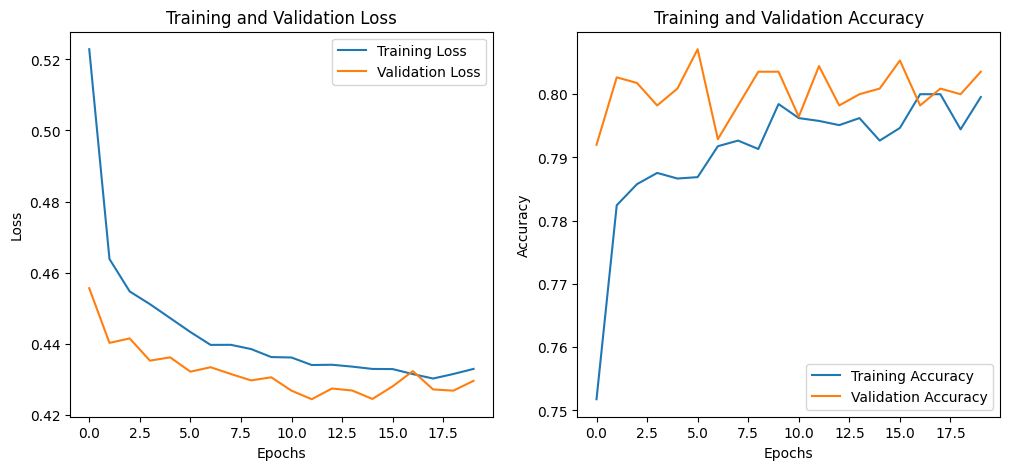

In [33]:
#plotting training and validation accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
#training loss vs validation loss
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
#training accuracy vs validation accuracy
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()



In [35]:
#hyper tuning model 
#tf+kt syntacx weird
print("**"*20)
print("HYPER PARAMETER TUNNING")
print("**"*20)

tuner=kt.RandomSearch(
   create_model, #model
   objective='val_accuracy',#on this basis it will evaluate the performance of different hyperparameter combinations and select the one that yields the highest validation accuracy.
   max_trials=10, #run 10 different combinations of hyperparameters to find the best one for the model.
   directory='keras_tuning',#this is the directory where the tuner will save the results of the hyperparameter tuning process, including the different combinations of hyperparameters tried and their corresponding performance metrics. This allows for easy access and analysis of the tuning results.
   project_name='churn_analysis'
)

#early stopping to prevent overfitting
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,#if the validation loss does not improve for 3 consecutive epochs, the training will be stopped to prevent overfitting and save computational resources.
    )
#tuner.search is used to start the hyperparameter tuning process, where it will train multiple models with different combinations of hyperparameters and evaluate their performance based on the validation accuracy. The early_stopping callback is included to stop the training process if the validation loss does not improve for 3 consecutive epochs, helping to prevent overfitting and save computational resources during the tuning process.
tuner.search(x_train_scaled,y_train,
             epochs=20,validation_split=0.2,
             callbacks=[early_stopping])

Trial 10 Complete [00h 00m 09s]
val_accuracy: 0.8106666803359985

Best val_accuracy So Far: 0.8115555644035339
Total elapsed time: 00h 01m 31s


In [36]:
tuner

In [37]:
tuner.results_summary()

Results summary
Results in keras_tuning\churn_analysis
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 06 summary
Hyperparameters:
units_1: 32
second_layer: False
units_2: 16
Score: 0.8115555644035339

Trial 09 summary
Hyperparameters:
units_1: 64
second_layer: False
units_2: 32
Score: 0.8106666803359985

Trial 03 summary
Hyperparameters:
units_1: 64
second_layer: False
units_2: 16
Score: 0.8097777962684631

Trial 05 summary
Hyperparameters:
units_1: 128
second_layer: False
units_2: 16
Score: 0.8088889122009277

Trial 07 summary
Hyperparameters:
units_1: 64
second_layer: True
units_2: 32
Score: 0.8080000281333923

Trial 01 summary
Hyperparameters:
units_1: 64
second_layer: False
Score: 0.8071110844612122

Trial 02 summary
Hyperparameters:
units_1: 64
second_layer: True
units_2: 16
Score: 0.8071110844612122

Trial 04 summary
Hyperparameters:
units_1: 32
second_layer: True
units_2: 16
Score: 0.8062222003936768

Trial 00 summary
Hyperparameters:
units_1: 128


In [39]:
# Get the best model from the tuner
best_model = tuner.get_best_models(num_models=1)[0]
#this will give us the best model based on the highest validation accuracy achieved during the hyperparameter tuning process. The get_best_models method retrieves the top-performing model(s) from the tuner, and by specifying num_models=1, we are requesting only the single best model to be returned for further evaluation or deployment.

# Save the best model
best_model.save('churn_model_trained.h5')

# Alternatively, if you want to save the tuner state:
# tuner.save()  # This saves to the directory specified during tuner creation

In [40]:
#file handling
with open('python_basic.txt','w') as f:
    f.write("This is a basic python file handling example.")

Best Hyperparameters found :
units_1: 32
second_layer: False
units_2: 16
Epoch 1/20
141/141 [==============================] - 1s 3ms/step - loss: 0.6397 - accuracy: 0.6016 - val_loss: 0.5207 - val_accuracy: 0.7307
Epoch 2/20
141/141 [==============================] - 1s 4ms/step - loss: 0.4940 - accuracy: 0.7638 - val_loss: 0.4712 - val_accuracy: 0.7804
Epoch 3/20
141/141 [==============================] - 0s 2ms/step - loss: 0.4714 - accuracy: 0.7727 - val_loss: 0.4546 - val_accuracy: 0.7911
Epoch 4/20
141/141 [==============================] - 0s 2ms/step - loss: 0.4630 - accuracy: 0.7816 - val_loss: 0.4481 - val_accuracy: 0.8044
Epoch 5/20
141/141 [==============================] - 0s 2ms/step - loss: 0.4585 - accuracy: 0.7827 - val_loss: 0.4440 - val_accuracy: 0.8080
Epoch 6/20
141/141 [==============================] - 0s 2ms/step - loss: 0.4552 - accuracy: 0.7860 - val_loss: 0.4412 - val_accuracy: 0.8089
Epoch 7/20
141/141 [==============================] - 1s 4ms/step - loss: 0

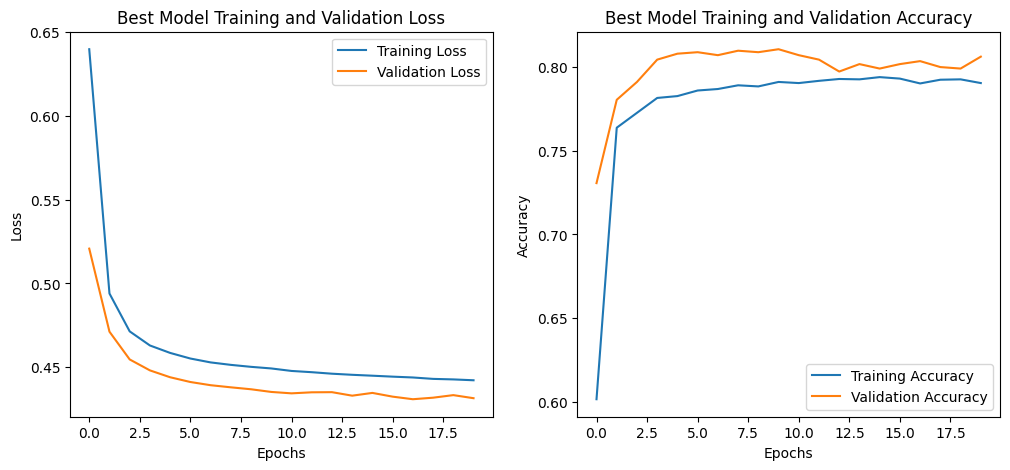

In [41]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters found :")
for params in best_hps.values:
    print(f'{params}: {best_hps.get(params)}')

best_model1=tuner.hypermodel.build(best_hps)
best_history=best_model1.fit(x_train_scaled,y_train,
                            epochs=20,validation_split=0.2,verbose=1)
best_loss,best_accuracy=best_model1.evaluate(x_test_scaled,y_test)
print("Best Model Test Loss:",best_loss)
print("Best Model Test Accuracy:",best_accuracy)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
#training loss vs validation loss
plt.plot(best_history.history['loss'],label='Training Loss')
plt.plot(best_history.history['val_loss'],label='Validation Loss')
plt.title('Best Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
#training accuracy vs validation accuracy
plt.plot(best_history.history['accuracy'],label='Training Accuracy')
plt.plot(best_history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Best Model Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


In [43]:
#why to save the model
#1. Reusability: Saving a model allows you to reuse it later without having to
# retrain it from scratch, which can save time and computational resources, especially if the training process is lengthy or requires a large dataset.
#2. Deployment: Saved models can be deployed in production environments, allowing you to serve predictions
#3. Sharing and Collaboration: Saving a model enables you to share it with others, whether it's for collaboration, research, or deployment purposes.
#  It allows others to use the trained model without needing access to the original training data or code.

best_model1.save('best_churn_model.h5')
#using keras save function to save the best model in h5 format, which is a common format for saving Keras models. This allows us to easily load the model later for inference or further training without needing to retrain it from scratch.
best_model1.save('best_churn_keras_model.keras')

In [44]:
with open('selected_features.pkl','wb') as f:
    pickle.dump(selected_features,f)

In [45]:
#consume the .h5 models
def load_model_component():
    # Load the scaler
    with open('scaler.pkl', 'rb') as f:
        scaler = pickle.load(f)
    
    # Load the best model
    best_model = tf.keras.models.load_model('best_churn_model.h5')
    
    # Load selected features
    with open('selected_features.pkl', 'rb') as f:
        selected_features = pickle.load(f)
    
    return best_model, scaler, selected_features

In [46]:
selected_features

['OnlineBackup',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [47]:
#prediction

#args and kwargs 
#args is used to pass a variable number of non-keyword arguments to a function, 
# while kwargs is used to pass a variable number of keyword arguments.
#  Both args and kwargs allow for flexibility in function definitions, 
# enabling the handling of different numbers and types of arguments when calling the function.
def predict_churn(*args):
    best_model, scaler, selected_features = load_model_component()
    
    # Create a DataFrame from the input arguments
    input_data = pd.DataFrame([args], columns=selected_features)
    
    # Scale the input data
    input_scaled = scaler.transform(input_data)
    
    # Make prediction
    prediction = best_model.predict(input_scaled)
    
    probability = float(prediction[0][0])
    churn_status = 'Yes' if probability > 0.5 else 'No'

    return {
        'churn_status': churn_status,
        'churn_probability': probability
    }

In [49]:
#gradio is a Python library that allows you to quickly create interactive web applications
#  for machine learning models.
#  It provides a simple interface to build user-friendly interfaces for your models, 
# enabling users to input data and receive predictions in real-time without needing to write complex frontend code.
#  Gradio is particularly useful for showcasing machine learning models and making them accessible to a wider audience,
# including those who may not have programming experience.


#heroku free many days - user interface to deploy

import gradio as gr
import os

#why os? os is used to interact with the operating system, allowing you to perform tasks such as file handling, environment variable management, and executing system commands. In the context of deploying a machine learning model, os can be used to manage files, load models, and handle other system-level operations necessary for the deployment process. 

In [50]:
selected_features

['OnlineBackup',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [53]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,OnlineBackup,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.517491,0.298493,32.421786,0.871303,0.407281,1.315557,64.798208,2283.300441,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.737917,0.491363,1.149523,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,35.587500,401.450000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,29.000000,1.000000,0.000000,1.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [68]:
# Check the unique values and their mappings in OnlineBackup column
print("Unique values in OnlineBackup column:")
print(df['OnlineBackup'].unique())
print("\nValue counts:")
print(df['OnlineBackup'].value_counts().sort_index())

# Since OnlineBackup was encoded using pd.factorize in Cell 13, let's find the mapping
# by checking the original data before encoding
print("\nTo understand the mapping, let's reload and check the original categorical values:")
df_original = pd.read_csv(url)
print(df_original['OnlineBackup'].unique())
print("\nOriginal OnlineBackup value counts:")
print(df_original['OnlineBackup'].value_counts())




Unique values in OnlineBackup column:
[0 1 2]

Value counts:
OnlineBackup
0    2425
1    3087
2    1520
Name: count, dtype: int64

To understand the mapping, let's reload and check the original categorical values:
['Yes' 'No' 'No internet service']

Original OnlineBackup value counts:
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


In [69]:
# Check the unique values and their mappings in PaperlessBilling column
print("Unique values in PaperlessBilling column:")
print(df['PaperlessBilling'].unique())

print("\nValue counts:")
print(df['PaperlessBilling'].value_counts().sort_index())

# Since PaperlessBilling was encoded using pd.factorize,
# reload original data to understand mapping
print("\nReloading original data to check categorical values:")

df_original = pd.read_csv(url)

print("\nOriginal unique values:")
print(df_original['PaperlessBilling'].unique())

print("\nOriginal value counts:")
print(df_original['PaperlessBilling'].value_counts())

Unique values in PaperlessBilling column:
[0 1]

Value counts:
PaperlessBilling
0    4168
1    2864
Name: count, dtype: int64

Reloading original data to check categorical values:

Original unique values:
['Yes' 'No']

Original value counts:
PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64


In [70]:
# Check the unique values and their mappings in PaymentMethod column
print("Unique values in PaymentMethod column:")
print(df['PaymentMethod'].unique())

print("\nValue counts:")
print(df['PaymentMethod'].value_counts().sort_index())

# Since PaymentMethod was encoded using pd.factorize,
# reload original data to understand mapping
print("\nReloading original data to check categorical values:")

df_original = pd.read_csv(url)

print("\nOriginal unique values:")
print(df_original['PaymentMethod'].unique())

print("\nOriginal value counts:")
print(df_original['PaymentMethod'].value_counts())

Unique values in PaymentMethod column:
[0 1 2 3]

Value counts:
PaymentMethod
0    2365
1    1604
2    1542
3    1521
Name: count, dtype: int64

Reloading original data to check categorical values:

Original unique values:
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Original value counts:
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


In [72]:
# Create a Gradio interface for model deployment
def churn_prediction_interface(online_backup, paperless_billing, payment_method, monthly_charges, total_charges):
    """
    Predict customer churn based on input features
    """
    # Load model components
    best_model, scaler, selected_features = load_model_component()
    
    # Create input dataframe with selected features
    input_data = pd.DataFrame([[online_backup, paperless_billing, payment_method, monthly_charges, total_charges]], 
                              columns=selected_features)
    
    # Scale the input
    input_scaled = scaler.transform(input_data)
    
    # Make prediction
    prediction = best_model.predict(input_scaled, verbose=0)
    probability = float(prediction[0][0])
    churn_status = 'Yes' if probability > 0.5 else 'No'
    
    return churn_status, probability

# Create Gradio interface
#mention the input types and output types, and also the title and description of the interface to make it user-friendly and informative for users who will interact with it.

interface = gr.Interface(
    fn=churn_prediction_interface,
    inputs=[
        gr.Radio(choices=[("0 = Yes", 0), ("1 = No", 1), ("2 = No internet service", 2)], label="Online Backup", value=0), #['Yes' 'No' 'No internet service']
        gr.Checkbox(label="Paperless Billing"),#['Yes' 'No']
        gr.Radio(choices=[("0 = Electronic check", 0), ("1 = Mailed check", 1), ("2 = Bank transfer (automatic)", 2), ("3 = Credit card (automatic)", 3)], label="Payment Method", value=0),#['Electronic check' 'Mailed check' 'Bank transfer (automatic)''Credit card (automatic)']
        gr.Slider(minimum=0, maximum=150, step=0.1, label="Monthly Charges", value=50),
        gr.Slider(minimum=0, maximum=10000, step=0.1, label="Total Charges", value=1000)
    ],
    outputs=[
        gr.Textbox(label="Churn Status"),
        gr.Number(label="Churn Probability")
    ],
    title="Customer Churn Prediction",
    description="Predict whether a customer will churn based on selected features"
)

# Launch the interface
interface.launch(share=True)  # Set share=True for public link


* Running on local URL:  http://127.0.0.1:7865
* Running on public URL: https://a09b6c1a81abe5afca.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
